In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
dataframes={}

for i in range(10,105,5):
  for j in range(2,6):
     df = pd.read_csv(f'STR_STR_{i}_{j}.OUT',delim_whitespace=True)[['E11','SCAU11']]
     df['SCAU11'] = df['SCAU11']*100 # tO GET Mpa units
     df = df[df['E11']<=1]
     w = -1 * i
     df['strain_rate'] = math.pow(10,w)
     df['grain_size'] = j

     dataframes[f'df_{j}_{i}'] = df


<ipython-input-2-8588c514de7f>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'STR_STR_{i}_{j}.OUT',delim_whitespace=True)[['E11','SCAU11']]
<ipython-input-2-8588c514de7f>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'STR_STR_{i}_{j}.OUT',delim_whitespace=True)[['E11','SCAU11']]
<ipython-input-2-8588c514de7f>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'STR_STR_{i}_{j}.OUT',delim_whitespace=True)[['E11','SCAU11']]
<ipython-input-2-8588c514de7f>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f'STR_STR_{i}_{j}.OUT',delim

In [ ]:
print(dataframes.keys())

dict_keys(['df_2_10', 'df_3_10', 'df_4_10', 'df_5_10', 'df_2_15', 'df_3_15', 'df_4_15', 'df_5_15', 'df_2_20', 'df_3_20', 'df_4_20', 'df_5_20', 'df_2_25', 'df_3_25', 'df_4_25', 'df_5_25', 'df_2_30', 'df_3_30', 'df_4_30', 'df_5_30', 'df_2_35', 'df_3_35', 'df_4_35', 'df_5_35', 'df_2_40', 'df_3_40', 'df_4_40', 'df_5_40', 'df_2_45', 'df_3_45', 'df_4_45', 'df_5_45', 'df_2_50', 'df_3_50', 'df_4_50', 'df_5_50', 'df_2_55', 'df_3_55', 'df_4_55', 'df_5_55', 'df_2_60', 'df_3_60', 'df_4_60', 'df_5_60', 'df_2_65', 'df_3_65', 'df_4_65', 'df_5_65', 'df_2_70', 'df_3_70', 'df_4_70', 'df_5_70', 'df_2_75', 'df_3_75', 'df_4_75', 'df_5_75', 'df_2_80', 'df_3_80', 'df_4_80', 'df_5_80', 'df_2_85', 'df_3_85', 'df_4_85', 'df_5_85', 'df_2_90', 'df_3_90', 'df_4_90', 'df_5_90', 'df_2_95', 'df_3_95', 'df_4_95', 'df_5_95', 'df_2_100', 'df_3_100', 'df_4_100', 'df_5_100'])


In [ ]:
dataset_list = list(dataframes.keys())

In [ ]:
len(dataset_list)

76

[]

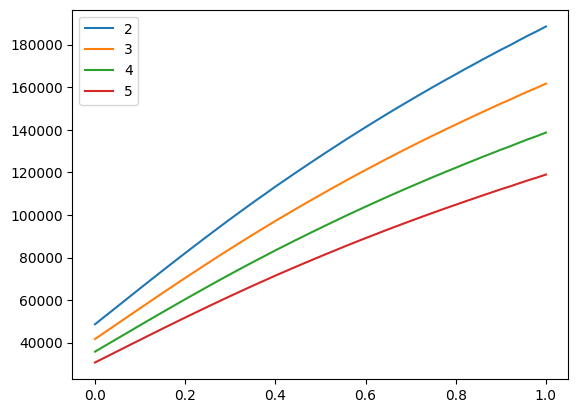

In [ ]:
leg=[]
for i in range(2,6):
  leg.append(str(i))
  plt.plot(dataframes[f'df_{i}_50']['E11'],dataframes[f'df_{i}_50']['SCAU11'])

plt.legend(leg)
plt.plot()

[]

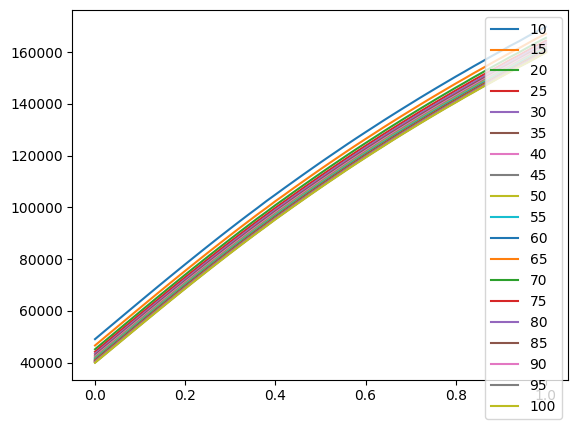

In [ ]:
leg=[]
for i in range(10,105,5):
  leg.append(str(i))
  plt.plot(dataframes[f'df_{i}_3']['E11'],dataframes[f'df_{i}_3']['SCAU11'])

plt.legend(leg)
plt.plot()

[]

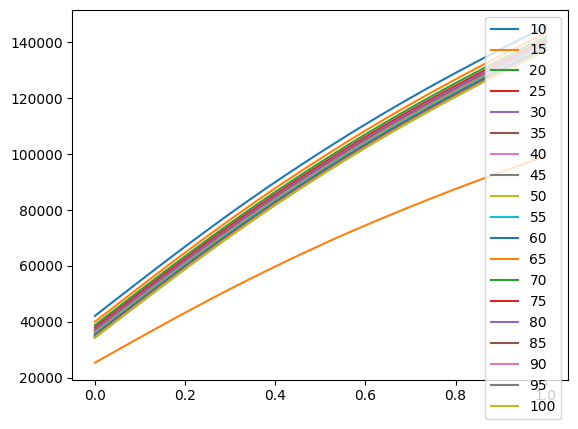

In [ ]:
leg=[]
for i in range(10,105,5):
  leg.append(str(i))
  plt.plot(dataframes[f'df_{i}_4']['E11'],dataframes[f'df_{i}_4']['SCAU11'])

plt.legend(leg)
plt.plot()

[]

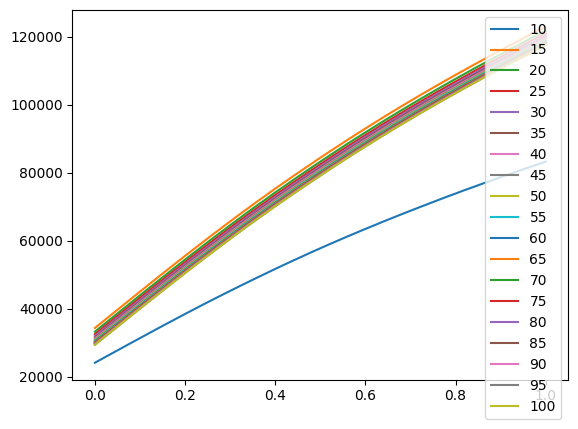

In [ ]:
leg=[]
for i in range(10,105,5):
  leg.append(str(i))
  plt.plot(dataframes[f'df_{i}_5']['E11'],dataframes[f'df_{i}_5']['SCAU11'])

plt.legend(leg)
plt.plot()

In [ ]:
def outlier(df):
  l = df.columns
  for i in l:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]
  return df

In [ ]:
def smoothing(df):
  l = df.columns
  for i in l:
    alpha = 0.5
    df[i] = df[i].ewm(alpha=alpha).mean()
  return df

In [ ]:
# Combining all the dataframes
df_merged = pd.concat(dataframes.values(),ignore_index=True)

In [ ]:
df_merged.shape

(3876, 4)

In [ ]:
# df_merged = outlier(df_merged)

In [ ]:
df_merged.shape

(3876, 4)

In [ ]:
target = df_merged['SCAU11']
df_merged.drop('SCAU11',axis=1,inplace=True)


In [ ]:
target.tail()

,SCAU11
3871,112030.0
3872,113450.0
3873,114760.0
3874,116190.0
3875,117600.0


In [ ]:
df_merged.tail()

,E11,strain_rate,grain_size
3871,0.92,0.00001,100
3872,0.94,0.00001,100
3873,0.96,0.00001,100
3874,0.98,0.00001,100
3875,1.00,0.00001,100


In [ ]:
degree=3
poly_features = PolynomialFeatures(degree=degree)

In [ ]:
df_merged.isna().sum()

,0
E11,0
strain_rate,0
grain_size,0


In [ ]:
strain_poly_train = poly_features.fit_transform(df_merged)
# strain_poly_test = poly_features.fit_transform(x_test)

In [ ]:
model = LinearRegression()
target = np.log10(target)
model.fit(strain_poly_train,target)

LinearRegression()

In [ ]:
coefficients = list(model.coef_)
intercept = model.intercept_

In [ ]:
print(coefficients)
print(intercept)

[0.0, 1.2138006320684445, 862.6112589900825, 0.0009097507662100449, -1.1350430494919062, 0.08586417519233014, 0.0019650163525105555, -762047.2435264718, -0.39071440660346657, -3.558111589688411e-05, 0.4607158112686278, 0.025110012230751176, -0.0006766992632068961, -8.7636665367633, -0.00025668167834498845, -7.5738949787284185e-06, 67824646.76658966, 29.601476799011724, 0.0006263171849763965, 2.443708913002496e-07]
4.495371821643816


In [ ]:
y_pred = model.predict(strain_poly_train)

In [ ]:
y_pred = np.power(10,y_pred)
target = np.power(10,target)

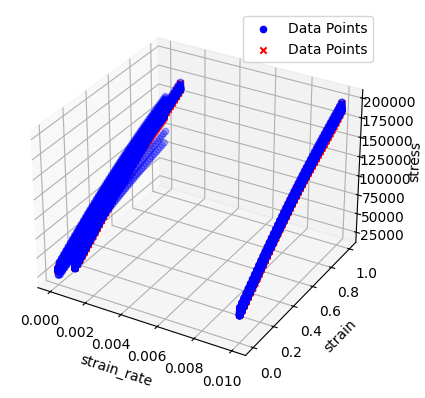

In [ ]:
a = list(df_merged['E11'])
b = list(target)
d = list(y_pred)
c = list(df_merged['strain_rate'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(c,a,b, color='b', marker='o', label="Data Points") # Original
ax.scatter(c,a,d, color='r', marker='x', label="Data Points") # Predicted
ax.set_xlabel('strain_rate')
ax.set_ylabel('strain')
ax.set_zlabel('stress')
plt.legend()
plt.show()

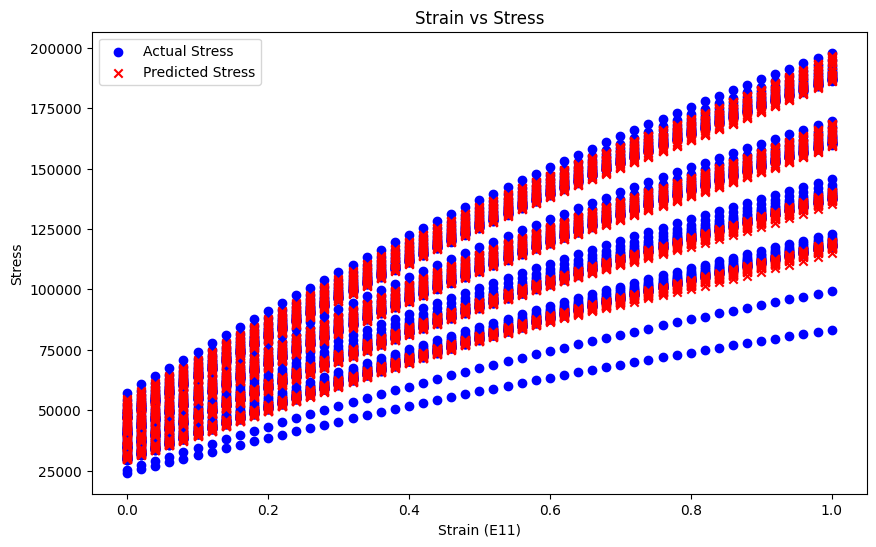

In [ ]:
# Plotting 2D graph of strain (E11) vs stress (target)
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(df_merged['E11'], target, color='b', marker='o', label="Actual Stress")

# Plot predicted data points
plt.scatter(df_merged['E11'], y_pred, color='r', marker='x', label="Predicted Stress")

# Setting labels and title
plt.xlabel('Strain (E11)')
plt.ylabel('Stress')
plt.legend()
plt.title('Strain vs Stress')

# Show plot
plt.show()

In [ ]:
target = list(target)
y_pred = list(y_pred)

for i in range(len(target)):
  print(target[i],y_pred[i],sep='...')

57229.99999999999...54745.313332075515
60653.00000000005...57882.463713708894
64048.000000000044...61073.93995912281
67457.99999999996...64312.567656158266
70856.99999999999...67590.99755064392
74250.99999999994...70901.76940773058
77628.99999999996...74237.37644763711
80990.99999999993...77590.3295619226
84334.99999999991...80953.22055002535
87654.99999999996...84318.78366152938
90953.00000000007...87679.95478649206
94223.99999999999...91029.92770216092
97477.99999999999...94362.20685741816
100700.0...97670.65625534391
103899.99999999996...100949.54407643923
107059.99999999994...104193.58276914984
110200.0000000001...107397.96441893773
113290.00000000013...110558.39128953307
116310.00000000001...113671.10151025048
119410.0000000001...116732.88995892202
122340.00000000007...119741.12446065032
125309.99999999991...122693.75748732622
128210.00000000006...125589.33360086268
131100.0000000001...128426.99293424968
133969.99999999997...131206.471048148
136800.00000000012...133928.09553755517

In [ ]:
model.coef_

array([ 0.00000000e+00,  1.21380063e+00,  8.62611259e+02,  9.09750766e-04,
       -1.13504305e+00,  8.58641752e-02,  1.96501635e-03, -7.62047244e+05,
       -3.90714407e-01, -3.55811159e-05,  4.60715811e-01,  2.51100122e-02,
       -6.76699263e-04, -8.76366654e+00, -2.56681678e-04, -7.57389498e-06,
        6.78246468e+07,  2.96014768e+01,  6.26317185e-04,  2.44370891e-07])

In [ ]:
model.intercept_

4.495371821643816

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target,y_pred)
print("Root Mean squared error is:",math.pow(mse,0.5))
print(mse)

Root Mean squared error is: 4345.053874389954
18879493.17135115


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(target,y_pred)
print(r2)

0.9871700967938096


In [ ]:
def generate_stress_equation(coefficients, intercept, feature_names):
    # Start building the equation with the intercept term
    equation = f"Stress (SCAU11) = {intercept:.5f}"

    # Add terms for each coefficient and feature name
    for coef, name in zip(coefficients, feature_names):
        # Skip terms with a coefficient very close to zero
        if abs(coef) > 1e-6:  # threshold to ignore very small coefficients
            # Format each term with parentheses around the coefficient for clarity
            equation += f" + ({coef:.5f}) * {name}"

    return equation

# Define the feature names generated by PolynomialFeatures for degree 3, including grain size
feature_names = [
    "1",                          # Constant term
    "E11",                        # x1
    "strain_rate",                # x2
    "grain_size",                 # x3
    "E11^2",                      # x1^2
    "E11 * strain_rate",          # x1 * x2
    "E11 * grain_size",           # x1 * x3
    "strain_rate^2",              # x2^2
    "strain_rate * grain_size",   # x2 * x3
    "grain_size^2",               # x3^2
    "E11^3",                      # x1^3
    "E11^2 * strain_rate",        # x1^2 * x2
    "E11^2 * grain_size",         # x1^2 * x3
    "E11 * strain_rate^2",        # x1 * x2^2
    "E11 * strain_rate * grain_size", # x1 * x2 * x3
    "E11 * grain_size^2",         # x1 * x3^2
    "strain_rate^3",              # x2^3
    "strain_rate^2 * grain_size", # x2^2 * x3
    "strain_rate * grain_size^2", # x2 * x3^2
    "grain_size^3"                # x3^3
]

# Use the coefficients and intercept obtained from the trained model
coefficients = [ 0.00000000e+00,  1.21380063e+00,  8.62611259e+02,  9.09750804e-04,
       -1.13504305e+00,  8.58641751e-02,  1.96501631e-03, -7.62047244e+05,
       -3.90714407e-01, -3.55811164e-05,  4.60715811e-01,  2.51100122e-02,
       -6.76699233e-04, -8.76366653e+00, -2.56681663e-04, -7.57389476e-06,
        6.78246468e+07,  2.96014768e+01,  6.26317185e-04,  2.44370893e-07]
intercept = 2.495371821408903

# Generate the equation
equation = generate_stress_equation(coefficients, intercept, feature_names)
print(equation)


# For degree 3

Stress (SCAU11) = 2.49537 + (1.21380) * E11 + (862.61126) * strain_rate + (0.00091) * grain_size + (-1.13504) * E11^2 + (0.08586) * E11 * strain_rate + (0.00197) * E11 * grain_size + (-762047.24400) * strain_rate^2 + (-0.39071) * strain_rate * grain_size + (-0.00004) * grain_size^2 + (0.46072) * E11^3 + (0.02511) * E11^2 * strain_rate + (-0.00068) * E11^2 * grain_size + (-8.76367) * E11 * strain_rate^2 + (-0.00026) * E11 * strain_rate * grain_size + (-0.00001) * E11 * grain_size^2 + (67824646.80000) * strain_rate^3 + (29.60148) * strain_rate^2 * grain_size + (0.00063) * strain_rate * grain_size^2


In [ ]:
# def generate_stress_equation(coefficients, intercept, feature_names):
#     # Start building the equation with the intercept term
#     equation = f"Stress (SCAU11) = {intercept:.5f}"

#     # Add terms for each coefficient and feature name
#     for coef, name in zip(coefficients, feature_names):
#         # Skip terms with a coefficient very close to zero
#         if abs(coef) > 1e-6:  # threshold to ignore very small coefficients
#             # Format each term with parentheses around the coefficient for clarity
#             equation += f" + ({coef:.5f}) * {name}"

#     return equation

# # Define the feature names for a 2nd-degree polynomial
# feature_names = [
#     "1",                          # Constant term
#     "E11",                        # x1
#     "strain_rate",                # x2
#     "grain_size",                 # x3
#     "E11^2",                      # x1^2
#     "E11 * strain_rate",          # x1 * x2
#     "E11 * grain_size",           # x1 * x3
#     "strain_rate^2",              # x2^2
#     "strain_rate * grain_size",   # x2 * x3
#     "grain_size^2"                # x3^2
# ]

# # Use the coefficients and intercept obtained from the trained model for 2nd-degree polynomial
# coefficients = [ 0.00000000e+00,  7.12806668e+02,  1.12096732e+06,  6.83407112e-01,
#        -5.42028232e+00,  2.69938634e+04,  1.23334904e-01, -1.05660099e+08,
#        -1.52051996e+02, -8.60283603e-03]
# intercept = 240.18113152611204

# # Generate the equation
# equation = generate_stress_equation(coefficients, intercept, feature_names)
# print(equation)


# For Degree 2